# Caso Analítica 2
#### Sebastian Cuevas
#### Pol Gràcia

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


### limpieza dataset

#### Books

In [13]:
# leer el archivo BX-Books.csv
books = pd.read_csv('../data/BX-CSV-Dump/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

# reemplazar los valores "NULL" y "0" en el campo "Year of Publication" por NaN
books.loc[books['Year-Of-Publication'] == 'NULL', 'Year-Of-Publication'] = np.nan
books.loc[books['Year-Of-Publication'] == '0', 'Year-Of-Publication'] = np.nan

# eliminar las filas con información incompleta o incorrecta en los campos "Author" o "Publisher"
books.dropna(subset=['Book-Author', 'Publisher'], inplace=True)

# guardar el archivo limpio en un nuevo archivo CSV
books.to_csv('../data/BX-CSV-Dump/BX-Books-clean.csv', index=False)

books.head()

C:\Users\polgracia\AppData\Local\Temp\ipykernel_20000\2054000222.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('../data/BX-CSV-Dump/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


#### Users

In [3]:
# Carga del archivo BX-Users.csv en un DataFrame
users = pd.read_csv('../data/BX-CSV-Dump/BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')

# Reemplazo de los valores "NULL" o en blanco en el campo "Age" por el valor "0"
users['Age'].replace(['NULL', ''], '0', inplace=True)

# Conversión del campo "Age" a tipo numérico
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')

# Guardado del DataFrame limpio en un nuevo archivo CSV
users.to_csv('../data/BX-CSV-Dump/BX-Users-Cleaned.csv', sep=';', index=False)

users.head()

C:\Users\polgracia\AppData\Local\Temp\ipykernel_20000\1948096234.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('../data/BX-CSV-Dump/BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Ratings

In [14]:
# Leer el archivo BX-Book-Ratings.csv
ratings = pd.read_csv('../data/BX-CSV-Dump/BX-Book-Ratings.csv', delimiter=';', encoding='latin-1')

# Eliminar filas donde Book-Rating es igual a cero
ratings = ratings[ratings['Book-Rating'] != 0]

# Guardar el archivo limpio como un nuevo archivo CSV
ratings.to_csv('../data/BX-CSV-Dump/BX-Book-Ratings-Cleaned.csv', sep=';', index=False, encoding='latin-1')

ratings.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


## 2 Análisi Cualitativo

### 2.1 ¿Cuál fue el año en el que se publicaron más libros? Muéstralo en un gráfico ¿Y el autor más plorífico? ¿Cuántos libros suyos hay en el dataset?

C:\Users\polgracia\AppData\Local\Temp\ipykernel_20000\1989652006.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books_df = pd.read_csv("../data/BX-CSV-Dump/BX-Books-clean.csv", sep=",", error_bad_lines=False, encoding="latin-1")
C:\Users\polgracia\AppData\Local\Temp\ipykernel_20000\1989652006.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("../data/BX-CSV-Dump/BX-Books-clean.csv", sep=",", error_bad_lines=False, encoding="latin-1")


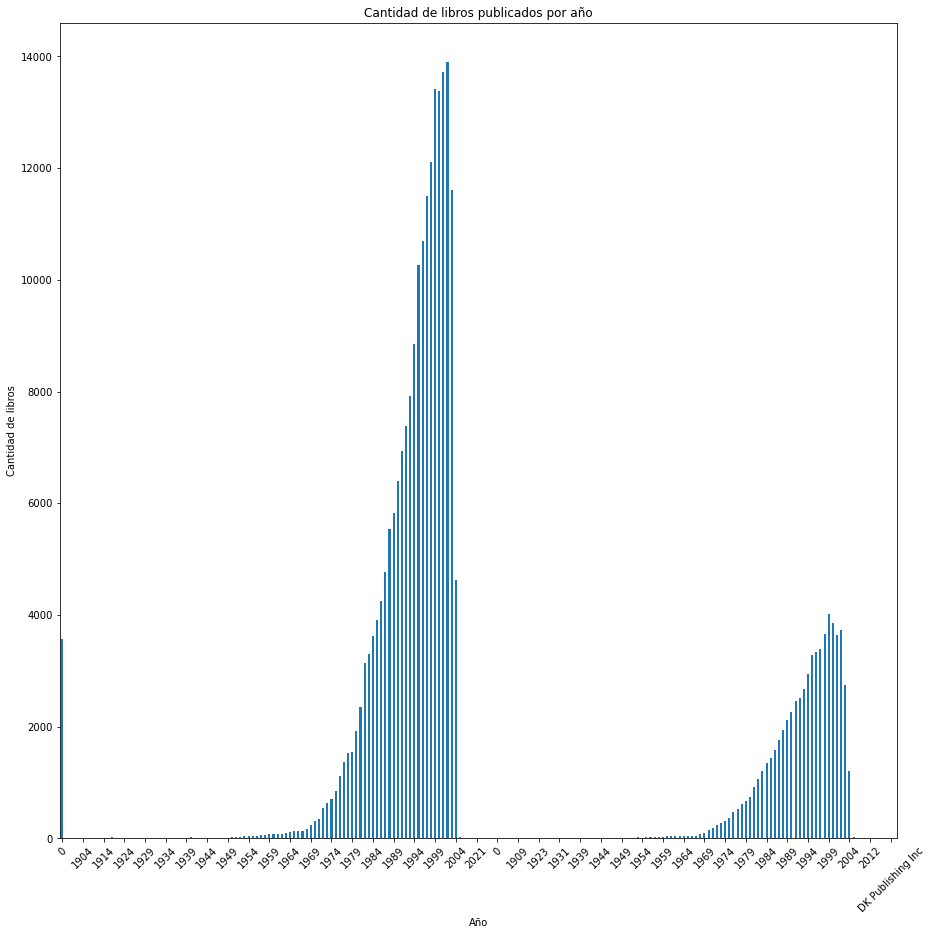

Año con más libros publicados: 2002
Autor más prolífico: Agatha Christie
Cantidad de libros del autor más prolífico: 632


In [7]:
# Cargar los datos del archivo CSV
books_df = pd.read_csv("../data/BX-CSV-Dump/BX-Books-clean.csv", sep=",", error_bad_lines=False, encoding="latin-1")

# Calcular el año en que se publicaron más libros
most_common_year = books_df["Year-Of-Publication"].value_counts().index[0]

# Graficar la cantidad de libros publicados por año
f=plt.figure(figsize=(15,15))
books_per_year = books_df.groupby("Year-Of-Publication")["ISBN"].count()
books_per_year.plot(kind="bar")
plt.title("Cantidad de libros publicados por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de libros")
plt.xticks(range(0, len(books_per_year), 5), rotation=45)
plt.show()

# Encontrar al autor más prolífico
most_prolific_author = books_df["Book-Author"].value_counts().index[0]
num_books_by_author = books_df["Book-Author"].value_counts()[most_prolific_author]

print("Año con más libros publicados:", most_common_year)
print("Autor más prolífico:", most_prolific_author)
print("Cantidad de libros del autor más prolífico:", num_books_by_author)


### 2.2	¿Cuáles son los orígenes geográficos y la edad de los reseñadores más jovenes? 

C:\Users\polgracia\AppData\Local\Temp\ipykernel_20000\4121368396.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_by_country['country'][users_by_country['country']=='usa'] = 'united states of america'


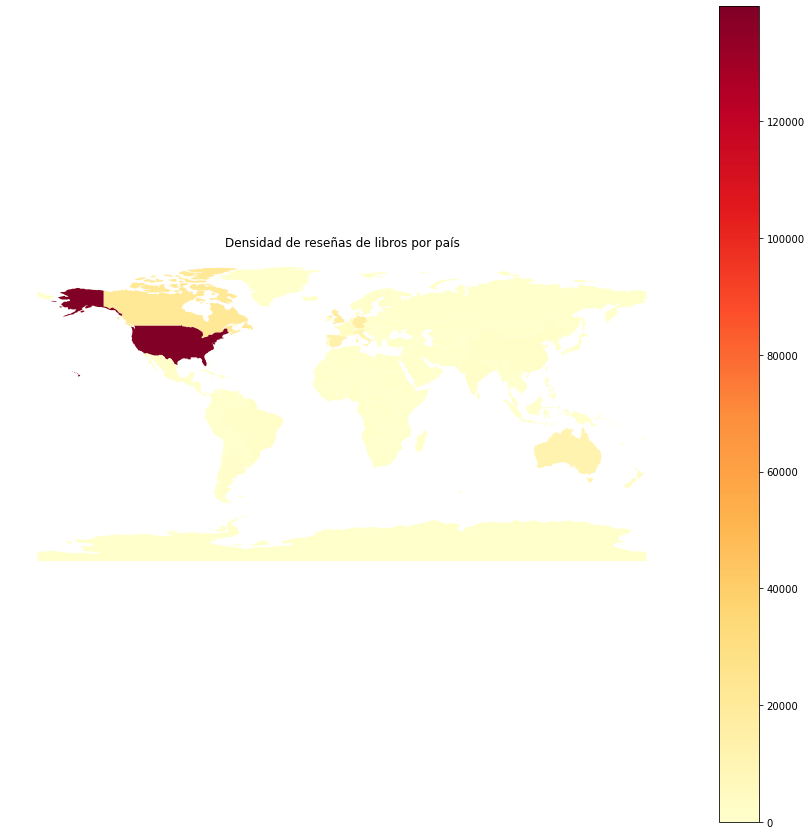

In [8]:

# Leer el archivo BX-Users.csv
users = pd.read_csv('../data/BX-CSV-Dump/BX-Users-Cleaned.csv', sep=';', encoding='latin-1')

users['country'] = users['Location'].str.split(',').str[-1].str.strip()
# Contar el número de usuarios por país
users_by_country = users.groupby('country')['User-ID'].count().reset_index(name='User count')

#take big countries
users_by_country[(users_by_country['User count'] > 1000) & (users_by_country['country'])]
users_by_country['country'][users_by_country['country']=='usa'] = 'united states of america'

# Cargar el archivo de shapefile del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name'] = world['name'].str.lower()

# Unir los datos de usuarios con los datos del shapefile
users_geo = world.merge(users_by_country, left_on='name', right_on='country', how='left')
users_geo = users_geo.fillna(0)

# Crear un plot geográfico
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Densidad de reseñas de libros por país')

# Mostrar el mapa de calor de la densidad de usuarios
users_geo.plot(column='User count', cmap='YlOrRd', legend=True, ax=ax)

# Ocultar los ejes x e y
ax.axis('off')

# Mostrar el plot
plt.show()


In [11]:
#Unimos usuarios que hacen rates 

raters = pd.merge(ratings, users, on = 'User-ID', how = 'inner')

# Encontrar la edad del reseñador más joven
raters = raters[(~raters['Age'].isna()) & (raters['Age']>0)]
youngest_age = raters['Age'].min()

# Encontrar los orígenes geográficos de los reseñadores más jóvenes
youngest_reviewers = raters[raters['Age'] == youngest_age]['country'].unique()

print(f"Los orígenes geográficos de los reseñadores más jóvenes son: {', '.join(youngest_reviewers)}")
print(f"La edad del reseñador más joven es {youngest_age}")


Los orígenes geográficos de los reseñadores más jóvenes son: usa, greece, india, canada, spain, , italy, germany, united kingdom, japan, new zealand, australia, costa rica, portugal, switzerland
La edad del reseñador más joven es 1.0


### 2.3	Busca los mejores libros del año 2000 según Goodreads (https://www.goodreads.com/) utilizando técnicas de web scrapping ¿Cuáles de los autores que aparecen en la lista están también en el dataset? ¿Cuál fue el género más popular?

In [10]:
data = []
for w in range(1, 7):

    url = 'https://www.goodreads.com/list/best_of_year/2000?id=78.Best_Books_of_2000&page='+str(w)+''
    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('tr', {'itemtype': 'http://schema.org/Book'})

    

    for book in books:
        title = book.find('a', {'class': 'bookTitle'}).text.strip()
        author = book.find('a', {'class': 'authorName'}).text.strip()
    
        
        data.append({'Título': title, 'Autor': author})

    dflibros = pd.DataFrame(data)
    
dflibros['Genero'] = None

print(dflibros.head())

                                              Título               Autor
0  Harry Potter and the Goblet of Fire (Harry Pot...        J.K. Rowling
1               Angels & Demons (Robert Langdon, #1)           Dan Brown
2     A Storm of Swords (A Song of Ice and Fire, #3)  George R.R. Martin
3        The Amber Spyglass (His Dark Materials, #3)      Philip Pullman
4          The Amazing Adventures of Kavalier & Clay      Michael Chabon


In [ ]:
for w in range(1, 7):

# Inicializar el controlador de Chrome
    driver = webdriver.Chrome()

# Navegar a la página del libro
    driver.get("https://www.goodreads.com/list/best_of_year/2000?id=78.Best_Books_of_2000&page="+str(w)+"")

    for i in range(36, 100):

        try:
            button2 = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "tr:nth-child("+str(i+1)+") .bookTitle > span")))
            button2.click()
        except Exception:
            pass
    # Hacer clic en el botón "More Details" si existe
        try:
            button = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".BookPageMetadataSection__genres .Button__container .Button__labelItem")))
            button.click()
        except Exception:
            pass

    # Esperar a que aparezcan los elementos de géneros
        try:
            genre_elements = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".BookPageMetadataSection__genreButton .Button__labelItem")))
            genres = [genre.text for genre in genre_elements]
        except Exception:
            genres = "no"
            pass
    # Extraer los géneros
        #genres = [genre.text for genre in genre_elements]
        x=i
        if(w==2):
            x=100+i
        elif (w==3):
            x=200+i
        elif (w==4):
            x=300+i
        elif (w==5):
            x=400+i
        elif (w==6):
            x=500+i                                    
        dflibros.at[x, 'Genero'] = genres
        driver.back()
    # Cerrar el navegador
    driver.quit()    

In [ ]:

#Guardamos el dataset de libros
libros = pd.read_csv('../data/BX-CSV-Dump/libros.csv', sep=';', encoding='latin-1', error_bad_lines=False)

In [ ]:
libros.head()

In [ ]:
libros_clean = libros.dropna()
libros_clean = libros_clean.drop(libros_clean[libros_clean['Autor'] == 'NaN'].index)
# guardar el archivo limpio en un nuevo archivo CSV
libros_clean.to_csv('../data/BX-CSV-Dump/libros_clean.csv', index=False)

¿Cuáles de los autores que aparecen en la lista están también en el dataset? 

In [ ]:
# Limpiar los nombres de autor en ambos conjuntos de datos
libros_clean['Autor'] = libros_clean['Autor'].apply(lambda x: x.lower().strip())
books['Book-Author'] = books['Book-Author'].apply(lambda x: x.lower().strip())

# Crear una lista de autores que aparecen en ambos conjuntos de datos
autores_comunes = list(set(libros_clean['Autor']) & set(books['Book-Author']))

# Imprimir la lista de autores que aparecen en ambos conjuntos de datos
print(autores_comunes)

¿Cuál fue el género más popular?

In [ ]:
import re
# eliminar las filas que contienen valores faltantes
libros_clean.dropna(inplace=True)
# contar el número de veces que aparece cada género en el conjunto de datos
generos = libros_clean['Genero'].apply(lambda x: re.sub("'", "", x)).str.cat(sep=',').split(',')
generos_mas_comunes = pd.Series(generos).value_counts().head(1)

print(f"El género más popular es {generos_mas_comunes.index[0]} con {generos_mas_comunes[0]} libros.")

## 3. ANÁLISIS PREDICTIVO

### 3.1	Elige tres autores del dataset y calcula la probabilidad de que una nueva obra suya guste a los lectores

In [17]:
books['Book-Author'] = books['Book-Author'].apply(lambda x: x.lower().strip())
book_ratings = pd.merge(books, ratings, on='ISBN', how='inner')

# Seleccionar las obras de cada autor
vonda_mcintyre_books = book_ratings[book_ratings["Book-Author"] == "vonda n. mcintyre"]
simon_mawer_books = book_ratings[book_ratings["Book-Author"] == "simon mawer"]
catherine_coulter_books = book_ratings[book_ratings["Book-Author"] == "catherine coulter"]



# Calcular la probabilidad de que una obra de cada autor sea valorada con 7 o más puntos
vonda_mcintyre_prob = len(vonda_mcintyre_books[vonda_mcintyre_books["Book-Rating"] >= 7]) / len(vonda_mcintyre_books)
simon_mawer_prob = len(simon_mawer_books[simon_mawer_books["Book-Rating"] >= 7]) / len(simon_mawer_books)
catherine_coulter_prob = len(catherine_coulter_books[catherine_coulter_books["Book-Rating"] >= 7]) / len(catherine_coulter_books)

# Mostrar los resultados
print("Probabilidad de que una obra de vonda n. mcintyre guste a los lectores:", vonda_mcintyre_prob)
print("Probabilidad de que una obra de simon mawer guste a los lectores:", simon_mawer_prob)
print("Probabilidad de que una obra de stuart cohen guste a los lectores:", catherine_coulter_prob)

Probabilidad de que una obra de vonda n. mcintyre guste a los lectores: 0.6571428571428571
Probabilidad de que una obra de simon mawer guste a los lectores: 0.6363636363636364
Probabilidad de que una obra de stuart cohen guste a los lectores: 0.6785185185185185


### 3.2	Diseña un modelo que, a partir de un libro de entrada, te recomiende una nueva lectura. Puedes utilizar o bien el dataset proporcionado o bien un dataset creado por ti mismo (por ejemplo, utilizando técnicas de web scrapping 😉) y con más características (o una combinación de ambos). Respecto a este sistema, a modo de ejemplo, explica las recomendaciones que proporcionaría el modelo si entráramos los siguientes libros: 

•	A Court of Thornes and Roses de Sarah J. Maas

•	Hamlet de William Shakespeare

•	Don Quijote de la Mancha de Miguel de Cervantes
